In [1]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
from sklearn.svm import SVC 
from sklearn.metrics import ConfusionMatrixDisplay, f1_score, classification_report

## Mean MFCC Data

In [2]:
meansdf = pd.read_csv("df_mfcc_mean.csv")
meansdf = meansdf.drop(columns = ['Unnamed: 0','gender','intensity'])

In [3]:
#test train
#set data as X, labels as y
X = np.array(meansdf.drop(columns='emotion',axis=1))
y = np.array(meansdf['emotion'])

#divide into test train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [4]:
#grid search to tune parameters
from sklearn.model_selection import GridSearchCV
#set hyperparameters as dictionary
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
best_estimator = grid.best_estimator_
print(best_estimator)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

In [5]:
#create classifier
clf = svm.SVC(C=100, gamma=0.001)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [1]:
#confusion matrix and classification report
grid_predictions = grid.predict(X_test)
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap=plt.cm.Blues)
f1 = round(f1_score(y_test,y_pred,average='weighted'),4)
plt.title(f'{best_estimator} \n Balanced F1 score: {f1}')
print(classification_report(y_test,grid_predictions))#Output

NameError: name 'grid' is not defined

# Raw MFCC data

In [10]:
rawdf = pd.read_csv("mfcc_data.csv")

In [11]:
#test train
#set data as X, labels as y
X = np.array(rawdf.drop(columns='label',axis=1))
y = np.array(rawdf['label'])

#divide into test train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [12]:
#grid search to tune parameters
from sklearn.model_selection import GridSearchCV
#set hyperparameters as dictionary
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001], 'kernel': ['rbf', 'poly', 'sigmoid']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
best_estimator = grid.best_estimator_
print(best_estimator)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ...................

In [13]:
#create classifier
clf = svm.SVC(C=0.1, gamma=1, kernel='poly')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

           1       0.54      0.75      0.63        20
           3       0.80      0.76      0.78        49
           4       0.76      0.69      0.72        51

    accuracy                           0.73       120
   macro avg       0.70      0.73      0.71       120
weighted avg       0.74      0.72      0.73       120



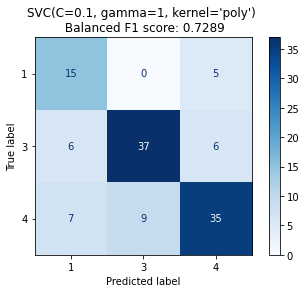

In [14]:
#confusion matrix and classification report
grid_predictions = grid.predict(X_test)
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap=plt.cm.Blues)
f1 = round(f1_score(y_test,y_pred,average='weighted'),4)
plt.title(f'{best_estimator} \n Balanced F1 score: {f1}')
print(classification_report(y_test,grid_predictions))#Output